In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
wrs = pd.read_csv('../Capstone_csv_file/wrs_rec_salary_18-19')

In [3]:
wrs.dtypes

NAME         object
REC           int64
REC_rank    float64
salary        int64
dtype: object

In [4]:
wrs.head()

,NAME,REC,REC_rank,salary
0,Michael Thomas,125,1.0,2000000
1,Michael Thomas,125,1.0,1279743
2,DeAndre Hopkins,115,2.0,16200000
3,Julio Jones,113,3.5,14251209
4,Adam Thielen,113,3.5,4811500


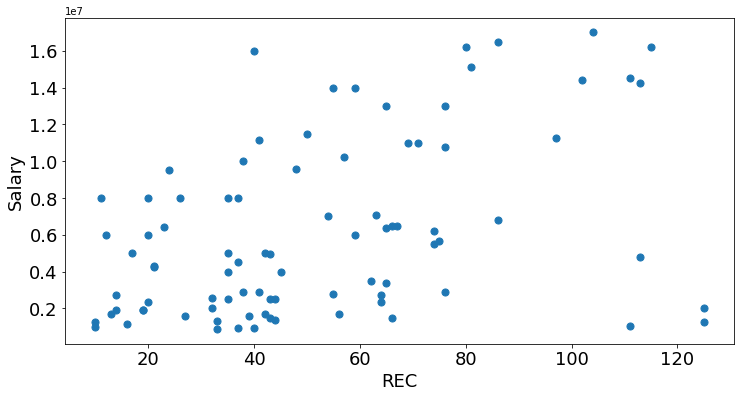

In [5]:
ax = wrs.plot(kind="scatter", x = 'REC',  y = 'salary', figsize = (12,6), s = 50)
plt.xlabel('REC', fontsize=18)
plt.ylabel("Salary", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [6]:
ss = StandardScaler()
X = ss.fit_transform(wrs.loc[:, ['REC', 'salary']])

In [7]:
X.mean(axis = 0)

array([ 2.55223684e-17, -5.35969736e-17])

In [8]:
X.std(axis = 0)

array([1., 1.])

In [9]:
km = KMeans(n_clusters = 5, random_state = 27)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=27, tol=0.0001, verbose=0)

In [10]:
km.cluster_centers_

array([[-0.80076892, -0.65731314],
       [ 0.47653184, -0.31930686],
       [ 1.51114108,  1.8395451 ],
       [ 2.26151702, -0.83160247],
       [-0.09406652,  1.01960592]])

In [11]:
km.predict(X)

array([3, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 1, 2, 2, 4, 1, 2, 1, 1, 1, 4, 4,
       1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 4, 1, 4, 1, 1, 4, 1, 4, 4, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 4, 4, 0, 0, 4, 0, 0, 0, 0, 0, 0,
       0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [12]:
wrs['clusters'] = km.labels_
wrs.head()

,NAME,REC,REC_rank,salary,clusters
0,Michael Thomas,125,1.0,2000000,3
1,Michael Thomas,125,1.0,1279743,3
2,DeAndre Hopkins,115,2.0,16200000,2
3,Julio Jones,113,3.5,14251209,2
4,Adam Thielen,113,3.5,4811500,3


In [13]:
ss.inverse_transform(km.cluster_centers_)

array([[2.87179487e+01, 3.10425126e+06],
       [6.61666667e+01, 4.69296683e+06],
       [9.65000000e+01, 1.48401209e+07],
       [1.18500000e+02, 2.28504700e+06],
       [4.94375000e+01, 1.09861979e+07]])

In [14]:
wrs.groupby('clusters')[['REC', 'salary']].mean()

,REC,salary
clusters,,
0,28.717949,3.104251e+06
1,66.166667,4.692967e+06
2,96.500000,1.484012e+07
3,118.500000,2.285047e+06
4,49.437500,1.098620e+07


In [15]:
centroids = wrs.groupby('clusters')[['REC', 'salary']].mean()

<Figure size 504x504 with 0 Axes>

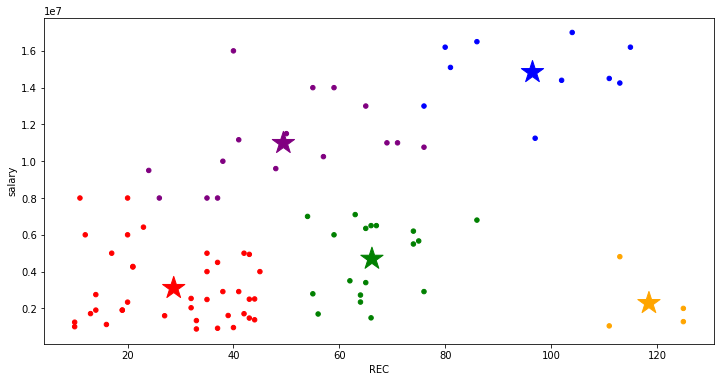

In [16]:
plt.figure(figsize = (7,7));

colors = ['red', 'green', 'blue', 'orange', 'purple']
wrs['color'] = wrs['clusters'].map(lambda p: colors[p])

ax = wrs.plot(    
    kind = 'scatter', 
    x = 'REC', y = 'salary',
    figsize = (12,6),
    c = wrs['color']
);

centroids.plot(
    kind = 'scatter', 
    x = 'REC', y = 'salary', 
    marker = '*', c = colors, s = 550,
    ax = ax
);

In [17]:
km.inertia_

29.54498534879084

In [18]:
silhouette_score(X, km.labels_)

0.452340098613149